In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt

p = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [3]:
ab = 'mouse_talon_abundance.tsv'
ver = 'vM25_cerberus'
min_tpm = 1

## PolyA gene detection at 0, 1, and 100 TPM


Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1794: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1793: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Applying gene type and novelty subset
Number of genes reported: 29965
Detected 29965 / 45353 (66.1%) annotated polyA genes
protein_coding
84.8757948671028

lncRNA
59.87548950697861

pseudogene
18.37458441078685



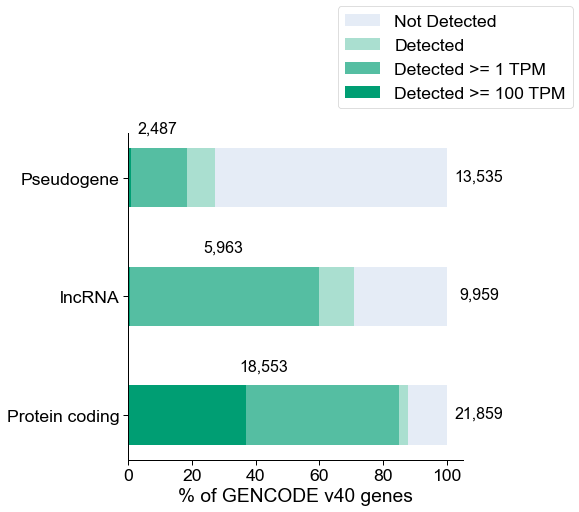

In [3]:
df = pd.read_csv(ab, sep='\t')
plot_gene_det_by_biotype_tpm(df,
                             how='gene',
                             ver=ver,
                             species='mouse')

## PolyA gene detection

What fraction of polyA genes from the annotation do we detect with >= 1 TPM in any library?

In [4]:
df = pd.read_csv(ab, sep='\t')
df, inds = get_tpm_table(df,
                   how='gene',
                   min_tpm=min_tpm,
                   gene_subset='polya',
                   species='mouse')

gene_df, b_counts, b_cat_counts = get_gtf_info(how='gene', ver=ver)

polya_biotypes = ['protein_coding', 'pseudogene', 'lncRNA']
polya_genes = gene_df.loc[gene_df.biotype_category.isin(polya_biotypes), 'gid'].tolist()
n_polya = len(polya_genes)
n_det_polya = len(df.index)

print('Detected {} / {} ({:.3}%) annotated polyA genes'.format(n_det_polya, n_polya, (n_det_polya/n_polya)*100))

Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes
Enforcing minimum TPM
Total # genes detected: 252602
# genes >= 1 tpm: 177043
Applying gene type and novelty subset
Number of genes reported: 27003
Detected 27003 / 45353 (59.5%) annotated polyA genes


In [4]:
df = pd.read_csv(ab, sep='\t')
df, inds = get_tpm_table(df,
                   how='gene',
                   min_tpm=min_tpm,
                   gene_subset='protein_coding',
                   species='mouse')

gene_df, b_counts, b_cat_counts = get_gtf_info(how='gene', ver=ver)

biotypes = ['protein_coding']
genes = gene_df.loc[gene_df.biotype_category.isin(biotypes), 'gid'].tolist()
n = len(genes)
n_det = len(df.index)

print('Detected {} / {} ({:.3}%) annotated protein coding genes'.format(n_det, n, (n_det/n)*100))

Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for protein_coding genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1794: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1793: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 252602
# genes >= 1 tpm: 177043
Applying gene type and novelty subset
Number of genes reported: 18553
Detected 18553 / 21859 (84.9%) annotated protein coding genes
